### 📊 **📊 기상청 공공데이터 1: 데이터 수집**

---

# 📝 **소개**

이 노트북은 기상청(KMA) 공공데이터 (https://apihub.kma.go.kr/)에서 날씨 관련 데이터를 수집하는 방법을 시연하기 위해 제작되었습니다.

다음 세 가지 주요 작업을 다룹니다:

1. **📍 관측소 정보 매핑:**  
   기상청의 관측소 정보를 조회하고, 해당 관측소 위치를 인터랙티브 지도에 시각화합니다.

2. **🌡️ 기온 데이터 수집:**
기상청 API를 사용하여 기온 데이터를 수집하고, 이를 체계적으로 정리하여 활용할 수 있도록 합니다.

3. **🌫️ PM10(미세먼지) 데이터 수집:**
기상청 API에서 PM10(미세먼지) 데이터를 다운로드하여 시간별 시계열 데이터로 가공하고, 향후 활용할 수 있도록 정리합니다.

---

### 📝 **연습 과제**

이 노트북에는 **연습 과제(Practice Tasks)**가 포함되어 있으며, 배운 내용을 적용하여 특정 연습 문제를 해결하게 됩니다.
이러한 과제는 개념을 더욱 확실히 이해하고 데이터 수집 기술을 향상하는 데 도움을 줄 것입니다.

---

그럼 시작해볼까요?🚀


# ⚙️ **1. 설정**

In [6]:
# modules
import pandas as pd #판다스 가져오기
import requests

import matplotlib.pyplot as plt #그림그리기 라이브러리

In [2]:
#구글 드라이브로 받기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Google Colab에서 Basemap 설치 및 사용


Matplotlib Basemap Toolkit은 Python에서 2D 데이터를 지도 위에 시각화하는 라이브러리입니다.
Google Colab에서 매번 설치하는 대신, Google Drive에 패키지를 설치하여 여러 세션에서 재사용할 것입니다.









In [8]:
#Basemap => Cartopy ref. https://wikidocs.net/229245
# GEOS, PROJ, 기타 의존성 설치
!apt-get install -y libproj-dev proj-data proj-bin \
                    libgeos-dev libgeos++-dev

# Cython과 pyshp 등 필요한 패키지 설치
!pip install cython numpy pyshp shapely

# Cartopy 설치
!pip install cartopy
print("Cartopy installed!")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (9.1.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.1.1-1~jammy0).
proj-data set to manually installed.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos++-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 30 not upgraded.
Need to get 590 kB of archives.
After this operation, 3,515 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 libgeos++-dev amd64 3.11.1-1~jammy0 [393 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.1.1-1~jammy0 [197 kB]
Fetched 590 kB in 1s (563 kB/s)
Selecting previously unselected package libgeos++-dev.
(Reading data

In [9]:
#cartopy : 지도 그리기 라이브러리
import cartopy.crs as ccrs #지도 투영법(좌표계) 설정
import cartopy.feature as cfeature #지도 요소 (지형, 경계선) 추가

# 🗺️ **2. 관측소 정보**



In [11]:
def download_kma_data(url, fpath):
    """
    주어진 KMA URL에서 데이터를 다운로드하고, 지정된 파일 경로에 저장하는 함수입니다.

    매개변수:
    - url (str): 데이터를 가져올 URL.
    - fpath (str): 다운로드한 데이터를 저장할 파일 경로.

    반환값:
    - 없음
    """
    try:
        # URL로 GET 요청을 보냅니다.
        response = requests.get(url)

        # 요청이 성공적인지 확인합니다. (HTTP 상태 코드 200은 성공을 의미)
        if response.status_code == 200:
            # 성공하면 파일을 로컬에 저장합니다.
            with open(fpath, 'wb') as file:  # 'wb'는 바이너리 형식으로 파일을 열기 위함
                file.write(response.content)  # 받은 데이터를 파일에 씁니다.
            print(f"다운로드가 성공적으로 완료되었습니다! 저장 위치: {fpath}")
        else:
            # 요청이 실패한 경우 상태 코드와 함께 에러 메시지를 출력합니다.
            print(f"파일 다운로드 실패. 상태 코드: {response.status_code}")

    except Exception as e:
        # 예외가 발생한 경우 에러 메시지를 출력합니다.
        print(f"오류가 발생했습니다: {e}")


In [12]:
# https://apihub.kma.go.kr/ > 지상관측 > 지상관측 지점정보
url = 'https://apihub.kma.go.kr/api/typ01/url/stn_inf.php?inf=SFC&stn=&tm=202211300900&help=1&authKey=DeWo9mhFRAelqPZoRbQH9Q'
# where to download the  file
fpath = '/content/drive/MyDrive/Weather_BigData/kma_list.csv'

download_kma_data(url, fpath)

다운로드가 성공적으로 완료되었습니다! 저장 위치: /content/drive/MyDrive/Weather_BigData/kma_list.csv


In [13]:
df = pd.read_csv(fpath, #fpath(드라이브 csv파일) 읽어오기
                 encoding='euc-kr', #한국말 패치
                 comment='#', # 주석처리된 거 안 읽을래
                 sep=r'\s+',  # 공백or탭을 구분자로 한다
                 on_bad_lines='skip' #에러난 라인 스킵해
                 )
#↓ csv파일에는 열이름(칼람)이 안 들어있어서 df(데이터프레임)에 칼람 추가
df.columns=['STN','LON','LAT','STN_SP','HT','HT_PA','HT_TA','HT_WD','HT_RN','STN_AD','STN_KO','STN_EN','FCT_ID','LAW_ID','BASIN']
print(df.head())

   STN        LON       LAT  STN_SP      HT   HT_PA  HT_TA  HT_WD  HT_RN  \
0   93  127.75443  37.94738   31201   95.78   96.78    1.5   10.0    1.4   
1   95  127.30420  38.14787   31110  155.48  156.98    1.8   13.0    1.5   
2   98  127.06070  37.90188   22200  115.62  116.74    1.7   10.0    1.0   
3   99  126.76648  37.88589   22300   30.59   31.99    1.7   10.0    1.0   
4  100  128.71834  37.67713   35400  772.43  773.43    1.7   10.0    1.4   

   STN_AD STN_KO         STN_EN    FCT_ID      LAW_ID BASIN  
0     101    북춘천   Bukchuncheon  11D10301  5111025024  ----  
1     101     철원       Cheorwon  11D10101  5178025624  ----  
2     119    동두천    Dongducheon  11B20401  4125010300  ----  
3     119     파주           Paju  11B20305  4148025025  ----  
4     100    대관령  Daegwallyeong  11D20201  5176038024  ----  


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


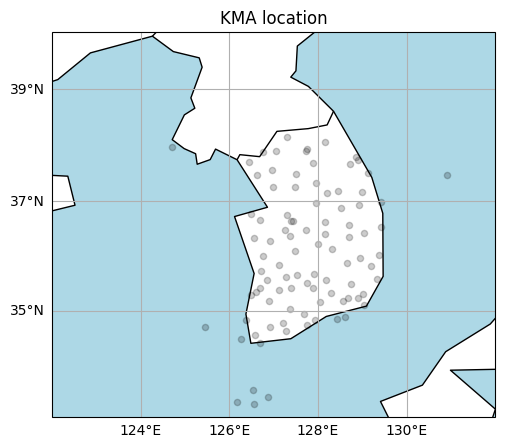

In [14]:
# 위도(lat)와 경도(lon) 범위 설정 (대한민국 주변 지역)
lat_min, lat_max = 33, 40  # 위도 최소, 최대
lon_min, lon_max = 122, 132  # 경도 최소, 최대


# 그래프 크기 설정 및 Mercator 투영법을 사용하는 지도 생성
plt.figure(figsize=(10, 5))  # 가로 10인치, 세로 5인치 크기
ax = plt.axes(projection=ccrs.Mercator())  # 지도 투영법 설정 (메르카토르 투영법 사용)
#plt.figure : 새로운 그림 만드는 함수
#plt.axes : 새 그래프 영역을 만드는 함수
#-> 이렇게하면 ax에 지도를 그릴 수 있음


# 지도 표시 영역 설정 (PlateCarree 투영법 사용)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
#set_extent: 지도의 범위(위도, 경도)를 설정하는 함수.
# [lon_min, lon_max, lat_min, lat_max]: 설정할 경도와 위도의 최소값과 최대값.
# crs=ccrs.PlateCarree(): PlateCarree 투영법을 사용해 경도와 위도를 설정.


# 지도 요소 추가 (저해상도 지도 사용)
ax.add_feature(cfeature.LAND.with_scale('110m'), facecolor='white')  # 육지(흰색)
ax.add_feature(cfeature.OCEAN.with_scale('110m'), facecolor='lightblue')  # 바다(연한 파란색)
ax.add_feature(cfeature.COASTLINE.with_scale('110m'))  # 해안선 추가
ax.add_feature(cfeature.BORDERS.with_scale('110m'))  # 국경선 추가
#지형 데이터의 해상도를 110(중간 해상도)로 설정 (낮을수록 더 자세히)


# 경도와 위도 격자선 추가 (경도는 2도 간격, 위도는 2도 간격으로 설정)
gl = ax.gridlines(draw_labels=True, xlocs=range(122, 133, 2), ylocs=range(33, 41, 2))
gl.top_labels = False  # 위쪽 라벨 숨김
gl.right_labels = False  # 오른쪽 라벨 숨김
# draw_labels=True: 격자선에 **라벨(경도, 위도 값)**을 표시하도록 설정.
# xlocs=range(122, 133, 2): 경도(위도)가 122에서 133까지 2도 간격으로 격자선을 그린다.
# ylocs=range(33, 41, 2): 위도(경도)가 33에서 41까지 2도 간격으로 격자선을 그린다.


# 데이터프레임(df)에 저장된 위치 데이터(위도, 경도)를 지도 위에 점으로 표시
ax.scatter(df['LON'], df['LAT'], s=20, color='black', alpha=0.2, transform=ccrs.PlateCarree())
# s=20 : 점 크기 설정
# color='black' : 점 색상 설정
# alpha=0.2 : 투명도 설정 (0.2는 많이 투명함)
# transform=ccrs.PlateCarree() : PlateCarree 투영법을 사용해 점을 정확한 위치에 표시


# 제목 추가 및 그래프 출력
plt.title("KMA location")  # 그래프 제목 설정
plt.show()  # 그래프 출력


# 📝 **Practice Task 1: 황사 관측소 정보 매핑**

이제 KMA(기상청) 관측소 데이터를 다운로드하고 지도에 표시하는 방법을 배웠으니, 네가 직접 연습해볼 차례야!

### 🚀 **과제:**
"황사지점정보" (황사 관측소 정보) 데이터를 KMA(기상청) URL을 통해 다운로드하세요.

다운로드한 황사 관측소 데이터를 지도에 시각화하세요.

황사 관측소를 빨간색으로 강조하여 지도에 표시하세요.

### 💡 **힌트:**
황사 관측소 목록은 기상청 웹사이트의 **"지상관측 > 황사관측 > 황사지점정보"**에서 찾을 수 있습니다.

데이터를 다운로드할 때 download_kma_data() 함수를 재사용하세요.

데이터에는 다음과 같은 컬럼이 포함되어 있습니다:['STN','TM_ED','TM_ST','STN_KO','STN_EN','STN_SP','LON','LAT','HT','STN','FCT_ID']


In [15]:
#
url = 'https://apihub.kma.go.kr/api/typ01/url/stn_pm10_inf.php?inf=kma&stn=&tm=201011110000&help=1&authKey=kkB1a-YrSriAdWvmK4q4Jg'
fpath2 = '/content/drive/MyDrive/Weather_BigData/kma_pm10_list.csv'

### download the data ###
download_kma_data(url, fpath2)
#
#실습용 코드
df2 = pd.read_csv(fpath2,
                 encoding='euc-kr', #한국말 패치
                 comment='#', # 주석처리된 거 안 읽을래
                 sep=r'\s+',  # 공백or탭을 구분자로 한다
                 on_bad_lines='skip' #에러난 라인 스킵해
                 )

df2.columns=['STN','TM_ED','TM_ST','STN_KO','STN_EN','STN_SP','LON','LAT','HT','STN0','FCT_ID']
print(df2.describe())

다운로드가 성공적으로 완료되었습니다! 저장 위치: /content/drive/MyDrive/Weather_BigData/kma_pm10_list.csv
              STN  STN_SP         LON        LAT           HT        STN0
count   26.000000    26.0   26.000000  26.000000    26.000000   26.000000
mean   145.730769     1.0  127.464749  36.431960   205.441923  132.307692
std     38.369319     0.0    1.418641   1.249635   267.254760   24.273062
min     94.000000     1.0  124.630460  33.293820    21.300000  101.000000
25%    116.750000     1.0  126.525092  35.625480    47.757500  109.000000
50%    138.000000     1.0  127.137054  36.599175    76.480000  133.000000
75%    166.750000     1.0  128.578630  37.472280   236.150000  150.500000
max    232.000000     1.0  130.898640  38.117222  1066.000000  184.000000


In [16]:
# 'Station_ID' 열을 기준으로 두 데이터프레임(df, df2) 병합
overlapped = pd.merge(df, df2, on='STN', how='inner')
# 'inner' : 두 데이터프레임에서 일치하는 행만 유지 (공통된 'STN' 값이 있는 행만 남김)

# 병합된 데이터프레임 크기 출력 (각 데이터프레임의 행과 열 개수 비교)
print(df.shape, df2.shape, overlapped.shape)
# df.shape : 원본 데이터프레임(df)의 행과 열 개수 출력
# df2.shape : 두 번째 데이터프레임(df2)의 행과 열 개수 출력
# overlapped.shape : 병합된 데이터프레임(overlapped)의 행과 열 개수 출력

# 병합된 데이터프레임의 처음 10개 행 중 앞 3개 열만 출력
print(overlapped.iloc[:10, :3])
# iloc[:10, :3] : 첫 10개의 행과 첫 3개의 열을 선택하여 출력

(93, 15) (26, 11) (20, 25)
   STN      LON_x     LAT_x
0  100  128.71834  37.67713
1  101  127.73570  37.90262
2  102  124.71237  37.97396
3  108  126.96580  37.57142
4  115  130.89863  37.48129
5  119  126.98300  37.25746
6  121  128.45743  37.18126
7  130  129.41278  36.99176
8  135  127.99458  36.22025
9  136  128.70733  36.57293


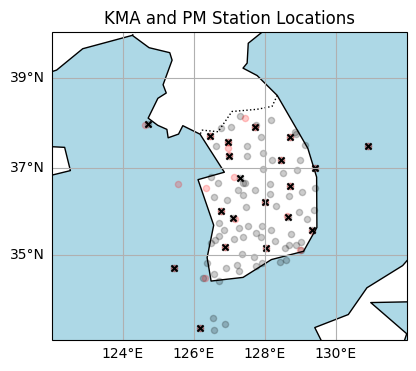

In [17]:
# 메르카토르(Mercator) 투영법을 사용하는 그림(figure) 생성
plt.figure(figsize=(8, 4))  # 가로 8인치, 세로 4인치 크기 설정

ax = plt.axes(projection=ccrs.Mercator())  # 지도 투영법을 메르카토르로 설정
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
# PlateCarree 투영법을 사용해 지도 표시 범위를 설정 (경도, 위도 범위 지정)

# 지도의 주요 지형 요소 추가 (가벼운 스타일의 지도 사용)
ax.add_feature(cfeature.COASTLINE.with_scale('110m'))  # 해안선 추가 (저해상도 110m)
ax.add_feature(cfeature.BORDERS.with_scale('110m'), linestyle=':')  # 국경선 추가 (점선 스타일)
ax.add_feature(cfeature.LAND.with_scale('110m'), facecolor='white')  # 육지를 흰색으로 설정
ax.add_feature(cfeature.OCEAN.with_scale('110m'), facecolor='lightblue')  # 바다를 연한 파란색으로 설정

# 경도와 위도 격자선 추가 (선택 사항, 필요하면 제거 가능)
gl = ax.gridlines(draw_labels=True, xlocs=range(122, 133, 2), ylocs=range(33, 41, 2))
gl.top_labels = False  # 위쪽 라벨 제거
gl.right_labels = False  # 오른쪽 라벨 제거

### 세 개의 데이터셋을 지도 위에 점으로 표시 ###
ax.scatter(df['LON'], df['LAT'], color='k', s=20, alpha=0.2, marker='o', transform=ccrs.PlateCarree())
# df: 검은색 원형 점 (관측소)

ax.scatter(df2['LON'], df2['LAT'], color='r', s=20, alpha=0.2, marker='o', transform=ccrs.PlateCarree())
# df2: 빨간색 원형 점 (황사지점)

ax.scatter(overlapped['LON_x'], overlapped['LAT_x'], color='k', s=20, alpha=1, marker='x', transform=ccrs.PlateCarree())
# overlapped: 검은색 X 표시 (df와 df2에 겹치는 지점)

# 그래프 제목 설정 및 출력
plt.title('KMA and PM Station Locations')  # 지도 제목
plt.show()  # 그래프 출력


# 🌡️ **3. 기온 데이터 수집**

# 📝 **연습 과제 2: 일별 기온 데이터 수집**

### 🚀 **과제:**
- 특정 관측소(@@ Station)의 2024년 4월 일별 기온 데이터를 찾으세요.
- 기상청(KMA) URL을 사용하여 데이터를 다운로드하세요.
- 수집한 데이터를 CSV 파일로 저장하여 향후 사용할 수 있도록 하세요.

### 💡 **힌트:**
- 기온 데이터는 **지상관측 > 종관기상관측 > 요소별 조회**에서 찾을 수 있습니다.
- 데이터를 가져올 때 **download_kma_data() 함수**를 재사용하세요.
- 관측소, 날짜 범위, 관측 유형을 정확히 지정하도록 URL 매개변수를 조정하세요.
- 데이터 컬럼 구조는 **['STN', 'LON', 'LAT', 'HT', 'TEMP']** 형식을 따르도록 하세요.
---


In [18]:
url='https://apihub.kma.go.kr/api/typ01/url/kma_sfctm5.php?tm1=202404010000&tm2=202404302359&obs=TA&stn=108&disp=0&help=1&authKey=dsi6kOLASrGIupDiwPqxYA'
fpath3 = '/content/drive/MyDrive/Weather_BigData/kma_temp_202404.csv'

#
download_kma_data(url, fpath3)

다운로드가 성공적으로 완료되었습니다! 저장 위치: /content/drive/MyDrive/Weather_BigData/kma_temp_202404.csv


In [23]:
#--------------------------------------------------------------------------------------------------
#  기상청 지상관측 시간자료
#--------------------------------------------------------------------------------------------------
#  1. TM     : 관측시각 (KST)
#  2. STN    : 국내 지점번호
#  3. LON    : 경도 (deg)
#  4. LAT    : 위도 (deg)
#  5. HT     : 노장 해발고도 (m)
#  6. VAL    : 조회된 값
#--------------------------------------------------------------------------------------------------

df = pd.read_csv(fpath3,
                 encoding='euc-kr', #한글 패치
                 comment='#', # #로 시작하는 줄은 무시
                 sep=r'\s+',  # 공백(스페이스, 탭 등)으로 구분된 데이터
                 header=None,#원본 파일에 열 이름이 없음
                 index_col=0,#첫번째 열을 인덱스로 사용
                 parse_dates=True, #날짜 자동 인식
                 names= ['STN','LON','LAT','HT','TEMP'], #열 이름 직접 지정
                 on_bad_lines='skip' # 에러난 라인 스킵해
                 )
# Display the DataFrame
print(df[:5])
print(df.shape) #행, 열 개수 확인

                     STN       LON       LAT     HT  TEMP
2024-04-01 00:00:00  108  126.9658  37.57142  85.67   9.5
2024-04-01 01:00:00  108  126.9658  37.57142  85.67   8.6
2024-04-01 02:00:00  108  126.9658  37.57142  85.67   7.7
2024-04-01 03:00:00  108  126.9658  37.57142  85.67   7.2
2024-04-01 04:00:00  108  126.9658  37.57142  85.67   6.7
(720, 5)


# 🌫️ **4. PM10(미세먼지) 데이터 수집**

In [20]:
#
url = 'https://apihub.kma.go.kr/api/typ01/url/kma_pm10.php?tm1=202404010000&tm2=202404312359&stn=108&authKey=Ubxg-7JUSNS8YPuyVLjUNQ'
fpath4 = '/content/drive/MyDrive/Weather_BigData/kma_pm10_202404.csv'

#
download_kma_data(url, fpath4)

다운로드가 성공적으로 완료되었습니다! 저장 위치: /content/drive/MyDrive/Weather_BigData/kma_pm10_202404.csv


In [24]:
#--------------------------------------------------------------------------------------------------
#  1. TM      : 관측시각(KST, 년월일시분)
#  2. STN_ID  : 기상청 PM10 지점번호
#  3. PM10    : PM10 (ug/m3)
#  4. FLAG    : 장비상태
#  5. MQC     : MQC 결과
#--------------------------------------------------------------------------------------------------
df = pd.read_csv(fpath4,
                 encoding='euc-kr',#한글 패치
                 comment='#', # #로 시작하는 줄은 무시
                 sep=',',  # 쉼표로 구분된 데이터
                 header=None, #원본 파일에 열 이름이 없음
                 index_col=0, #첫번째 열을 인덱스로 사용
                 parse_dates=True, #날짜 자동 인식
                 names=["STN","PM10","FLAG","MQC",'DUM'], #열 이름 직접 지정
                 on_bad_lines='skip' #에러난 라인 스킵
                 )
# Display the DataFrame
print(df[:5])
print(df.shape)


                     STN  PM10  FLAG  MQC DUM
2024-04-01 00:00:00  108    44     0  NaN   =
2024-04-01 00:05:00  108    44     4  NaN   =
2024-04-01 00:10:00  108    42     0  NaN   =
2024-04-01 00:15:00  108    42     0  NaN   =
2024-04-01 00:20:00  108    41     0  NaN   =
(8923, 5)


# 🎯 **결론**

기상청 공공데이터 수집 노트북을 마친 여러분, 훌륭한 작업이었습니다! 🚀

이 노트북에서 여러분은 다음을 배웠습니다:

- 📍 관측소 정보를 조회하고 인터랙티브 지도에 시각화하기
- 🌡️ 기상청 공공데이터 API에서 기온 데이터 수집하기
- 🌫️ PM10(미세먼지) 및 황사 데이터 다운로드 및 관리하기
- 🔗 데이터셋을 병합하여 종합적인 날씨 관련 데이터셋 만들기

### 💡 **반성:**
- 데이터 수집에서 가장 어려운 부분은 무엇이었나요?

- 데이터 처리 워크플로우를 어떻게 개선할 수 있을까요?

계속해서 연습하세요! 데이터 수집은 훌륭한 분석을 위한 기초입니다.
다음 노트북에서 만나요! 🚀📊